<a href="https://colab.research.google.com/github/KOWilliams/KOWilliams/blob/main/Gender_face_Recognition_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Biggest gender/face recognition dataset and it is located at https://www.kaggle.com/datasets/maciejgronczynski/biggest-genderface-recognition-dataset

In [9]:
!pip install kaggle
# The command pip install kaggle
# is used to install the Kaggle Python package using the pip package manager

In [10]:
from google.colab import files
files.upload()
# This line of code is used to upload files from
# the local machine to the Colab environment.

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kehindeoluwaseun","key":"34b8688e556df9e46dd1bf0ae96b6056"}'}

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# The set of code above are used to set up the Kaggle API key on my computer.
# The purpose of these commands is to create a directory named .kaggle
# in the home directory, we move the Kaggle API key file (kaggle.json) into
# that directory, and set the appropriate permissions to ensure that only
# the owner has read and write access to the API key file.
# This is done for security reasons to protect your Kaggle API credentials
# from unauthorized access. The Kaggle API key is used to authenticate and
# interact with the Kaggle platform programmatically.

In [13]:
!kaggle datasets download -d maciejgronczynski/biggest-genderface-recognition-dataset

 99% 434M/439M [00:04<00:00, 133MB/s]
100% 439M/439M [00:04<00:00, 94.7MB/s]


In [14]:
!unzip biggest-genderface-recognition-dataset -d biggest-genderface-recognition-dataset

Streaming output truncated to the last 5000 lines.
  inflating: biggest-genderface-recognition-dataset/faces/woman/woman_5038.jpg  
  inflating: biggest-genderface-recognition-dataset/faces/woman/woman_5039.jpg  
  inflating: biggest-genderface-recognition-dataset/faces/woman/woman_504.jpg  
  inflating: biggest-genderface-recognition-dataset/faces/woman/woman_5040.jpg  
  inflating: biggest-genderface-recognition-dataset/faces/woman/woman_5041.jpg  
  inflating: biggest-genderface-recognition-dataset/faces/woman/woman_5042.jpg  
  inflating: biggest-genderface-recognition-dataset/faces/woman/woman_5043.jpg  
  inflating: biggest-genderface-recognition-dataset/faces/woman/woman_5044.jpg  
  inflating: biggest-genderface-recognition-dataset/faces/woman/woman_5045.jpg  
  inflating: biggest-genderface-recognition-dataset/faces/woman/woman_5046.jpg  
  inflating: biggest-genderface-recognition-dataset/faces/woman/woman_5047.jpg  
  inflating: biggest-genderface-recognition-dataset/faces/w

In [15]:
import pandas as pd
import numpy as np
from glob import glob
import cv2
import os
# the code imports essential libraries for data analysis (pandas, numpy),
# file and directory manipulation (glob, os), and image processing (cv2).
# These libraries are commonly used in tasks related to data science,
# machine learning, and computer vision.
# Definition of the paths to the Biggest gender/face recognition dataset image folders (Man and Women)
man_folder = '/content/biggest-genderface-recognition-dataset/faces/man'
woman_folder = '/content/biggest-genderface-recognition-dataset/faces/woman'
# We are initializing the lists to store images and labels
images = []
labels = []
# We Load and pre-process Face With Mask Classification Dataset images (Man)
for filename in os.listdir(man_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(man_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(0)  # 0 represents Man
# We Load and pre-process Face Without Mask Classification Dataset images (Without Mask)
for filename in os.listdir(woman_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(woman_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(1)  # 1 represents Woman
# We Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

In [16]:
from sklearn.model_selection import train_test_split

# We are Spliting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

170/170 [==============================] - 34s 201ms/step


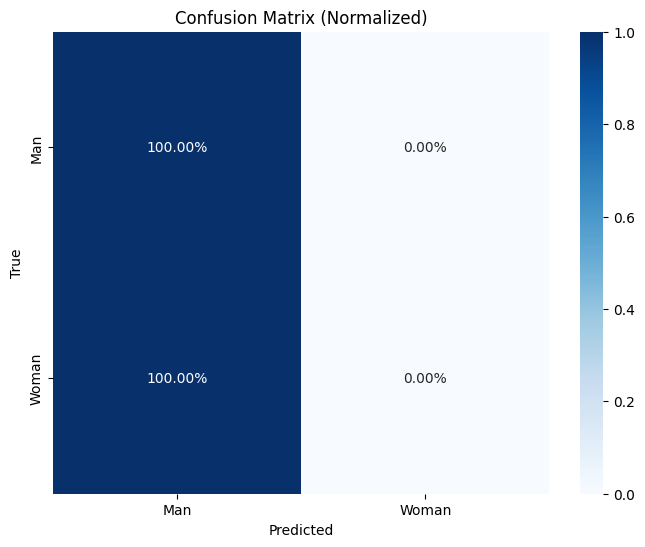

              precision    recall  f1-score   support

         Man       0.65      1.00      0.79      3549
       Woman       1.00      0.00      0.00      1885

    accuracy                           0.65      5434
   macro avg       0.83      0.50      0.40      5434
weighted avg       0.77      0.65      0.52      5434



In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(model, x_test, y_test, class_names=None, normalize=False):
    # Get predicted probabilities from the model
    predicted_probabilities = model.predict(x_test)

    # Convert predicted probabilities to class labels
    predicted_labels = np.argmax(predicted_probabilities, axis=1)

    # Get unique labels dynamically
    unique_labels = np.unique(np.concatenate((y_test, predicted_labels)))

    # Create the confusion matrix
    conf_matrix = confusion_matrix(y_test, predicted_labels, labels=unique_labels)

    # Normalize the confusion matrix if specified
    if normalize:
        conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1, keepdims=True)

    # Display the confusion matrix using a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='.2%' if normalize else 'd', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix (Normalized)' if normalize else 'Confusion Matrix')
    plt.show()

    # Display classification report
    class_report = classification_report(y_test, predicted_labels, labels=unique_labels, target_names=class_names, zero_division=1)
    print(class_report)

# Assuming 'model', 'x_test', 'y_test', and 'class_names' are properly defined
class_names = ['Man', 'Woman']
plot_confusion_matrix(model, x_test, y_test, class_names=class_names, normalize=True)

